# **Análise de Dados dos Álbuns do artista Post Malone**

## **Objetivo do projeto:**

O objetivo desse projeto é que seja feita uma análise de dados dos álbuns do spotify do artista Post Malone, passando pelas principais etapas de uma análise de dados. Coleta dos dados, pre-processamento, exploração e visualização dos dados.  

## **Etapas do projeto**

* Coleta do dados 
   1. Api do spotify
   2. Dicionario dos dados
   3. Importar os pacotes e dataset necessários
   4. Leitura do arquivo

* Limpeza e preparação dos dados
    1. Deletar colunas
    2. Renomear colunas 
    3. Verificar os tipos das colunas
    4. Alterar os tipos de colunas 
    5. Verificar dados ausentes
    6. Preencher dados ausentes
    7. Corrigindo dados duplicados
    8. Outliers
  
* Exploração e visualização dos dados 

## **Coleta dos dados**

A coleta de dados marca o início de qualquer projeto de dados. Se optarmos por não utilizar conjuntos de dados já disponíveis, devemos explorar fontes que possam ser úteis na construção da nossa base de dados. Embora fontes confiáveis como Kaggle ou portais governamentais sejam conhecidas por oferecer conjuntos de dados prontos, o desafio pode surgir ao procurar dados mais específicos, especialmente relacionados a um artista menos conhecido.

Uma abordagem comum para superar essa limitação é o web scraping, que envolve a extração de dados diretamente da web. No entanto, meu conhecimento limitado em web scraping levanta dúvidas sobre a viabilidade de coletar dados do site do Spotify dessa maneira.

Por outro lado, uma alternativa mais promissora é a utilização da API do Spotify. Apesar de não ser tão amplamente reconhecida, o Spotify oferece uma API que permite a coleta de dados de todos os artistas cadastrados, bem como dos próprios usuários. Para ter acesso à API do Spotify, é necessário criar uma aplicação web na plataforma de desenvolvedores do Spotify. Ao obter as credenciais necessárias, como o Client_Id e o Client_Secret, podemos usar a biblioteca SpotiPy em Python para se conectar à API, facilitando assim a coleta de dados do Spotify para análise.

A biblioteca SpotiPy foi desenvolvida com o propósito de proporcionar aos usuários acesso abrangente a todos os dados musicais disponibilizados pela plataforma Spotify. Com o SpotiPy, é viável extrair diversas informações relacionadas a um artista no Spotify, abrangendo detalhes sobre suas músicas, álbuns e até mesmo informações de catálogo referentes a artistas semelhantes identificados pela plataforma. A documentação da biblioteca, disponível em (https://spotipy.readthedocs.io/en/2.12.0/), oferece uma visão detalhada das diversas informações que podem ser coletadas do Spotify. Explorar essa documentação possibilita a aplicação prática da biblioteca para a obtenção e análise de dados específicos desejados.

### **Observação importante**

Como os resultados se baseiam com as músicas ouvidas no momento, a cada vez que os códigos sao rodados, pode se apresentar resultados diferentes. As consultas desse notebook foram efetuadas no dia 08/01, por tanto os resultados são baseados nesse dia.

**Intalando a biblioteca spotipy**

Este código está instalando a biblioteca `spotipy` no ambiente Python atual. `spotipy` é uma biblioteca Python que fornece uma interface para a API do Spotify, permitindo que você acesse e manipule dados do Spotify em seus programas Python.

Com `spotipy`, você pode acessar todos os recursos da API do Spotify, como obter metadados de faixas, álbuns e artistas, criar e gerenciar playlists, tocar música e muito mais.

In [113]:
!pip install spotipy

Este código importa as bibliotecas necessárias para trabalhar com a API do Spotify e para manipular dados com o pandas.


In [114]:
import spotipy
import pandas as pd

Agora é o momento de estabelecermos a conexão com a API. Para isso, importaremos o pacote de credenciais e passaremos as informações referentes à aplicação web que foi criada na plataforma de desenvolvedores do Spotify, `incluindo o Client Id` e o `Client Secret`. A variável denominada `"sp"` desempenha um papel crucial, pois é por meio dela que nos conectaremos à API, possibilitando assim a coleta de dados do Spotify. Essa variável será de grande utilidade em nossas operações futuras.

In [115]:
from spotipy.oauth2 import SpotifyClientCredentials

# Autenticação
sp = spotipy.Spotify(client_credentials_manager = SpotifyClientCredentials(client_id="cb9b123dd8a746a183f15e7e8380ab70", client_secret="df253699bbc64de5ad3216aa6791efd3"))

#### **Coletando os dados do Spotify fornecidos pela API com SpotiPy**

Para coletar os dados serão criadas funções que ao final serão chamadas ao escolhermos de qual artista queremos coletar os dados.

Esta função tem como objetivo recuperar dados detalhados de um álbum no Spotify, dado o identificador único do álbum (album_id). A função utiliza a biblioteca SpotiPy para interagir com a API do Spotify e extrair as informações necessárias.

In [116]:
def get_dados_dos_albuns(album_id):
    
    spotify_album = {}
     
    # Recuperar as músicas dos álbuns
    album = sp.album(album_id)
    tracks = sp.album_tracks(album_id)
    
    for n in range(len(tracks['items'])):
        id_track = tracks['items'][n]['id']
        track = sp.track(id_track)
        spotify_album[id_track] = {}
        
        # As variaveis (dados) que estou buscando das músicas
        spotify_album[id_track]['album'] = album['name']
        spotify_album[id_track]['album_type'] = album['album_type']
        spotify_album[id_track]['track_number'] = track['track_number']
        spotify_album[id_track]['id_track'] = id_track
        spotify_album[id_track]['name'] = track['name']
        spotify_album[id_track]['popularity'] = track['popularity']
        spotify_album[id_track]['explicit'] = track['explicit']
        spotify_album[id_track]['duration_ms'] = track['duration_ms']
        spotify_album[id_track]['release_date'] = album['release_date']
        spotify_album[id_track]['artists'] = [artist['name'] for artist in track['artists']]
    
    return spotify_album


Esta função tem como finalidade recuperar dados relacionados aos álbuns de um determinado artista no Spotify, com base no nome do artista fornecido (artist_name). A função utiliza a biblioteca SpotiPy para autenticação e interação com a API do Spotify, realizando a busca do artista, obtendo a lista de álbuns associados e, em seguida, coletando os dados detalhados de cada álbum utilizando a função get_dados_dos_albuns.

In [117]:
def get_artist_albums(artist_name):
    
    # Buscar o artista
    results = sp.search(q='artist:' + artist_name, type='artist')
    artist_id = results['artists']['items'][0]['id']
    
    # Obter os álbuns do artista
    albums = sp.artist_albums(artist_id, album_type='album')
    
    # Obter os dados dos álbuns
    all_album_data = {}
    for album in albums['items']:
        album_data = get_dados_dos_albuns(album['id'])
        all_album_data.update(album_data)
    
    return all_album_data


Este código obtém os dados dos álbuns do artista Post Malone, converte-os em um DataFrame e salva o DataFrame em um arquivo CSV.

In [118]:
# Usar a função para obter os dados dos álbuns do Post Malone
dados_dos_albuns = get_artist_albums('Post Malone')

# Converter o dicionário em um DataFrame
df = pd.DataFrame(dados_dos_albuns).T

# Salvar o DataFrame em um arquivo CSV
df.to_csv('dados_dos_albuns_Post_Malone.csv')

## **Post Malone**

![img](https://ligadoamusica.com.br/wp-content/uploads/2022/06/post-malone-2022.jpg)

Post Malone, cujo nome real é Austin Richard Post, é um cantor, rapper e compositor norte-americano nascido em 4 de julho de 1995. Ele ganhou reconhecimento internacional com o lançamento de seu álbum de estreia, "Stoney", em 2016, que incluiu hits como "Congratulations" e "White Iverson". A música de Post Malone abrange uma variedade de gêneros, incorporando elementos de hip-hop, pop, rock e R&B.

Ao longo de sua carreira, Post Malone continuou a alcançar sucesso com álbuns como "beerbongs & bentleys" (2018) e "Hollywood's Bleeding" (2019), que incluem canções populares como "Rockstar" e "Circles". Sua música é conhecida por sua diversidade sonora e letras introspectivas, e ele se destacou como uma figura influente na cena musical contemporânea. Além de sua carreira musical, Post Malone também é reconhecido por sua personalidade carismática e presença marcante na cultura pop.

### **Dicionário dos dados**

É crucial compreender o significado de cada variável (coluna) e sua relevância no conjunto de dados para obter uma compreensão inicial. Ao lidar com conjuntos de dados da web, geralmente há descrições disponíveis no site; no caso de conjuntos de dados empresariais, é aconselhável consultar a equipe de negócios, que geralmente possui um entendimento mais profundo. Além disso, é fundamental dialogar com um especialista no domínio associado ao conjunto de dados. Isso não só ajuda a compreender os dados, mas também o contexto em que estão inseridos, permitindo a formulação de hipóteses e conclusões.

Como o responsável pela coleta deste conjunto de dados, não encontrei informações disponíveis sobre as variáveis. No entanto, meu conhecimento como usuário do Spotify foi suficiente para entender e formular hipóteses sobre os dados, especialmente em relação ao artista NexoAnexo.

Aqui estão as definições das variáveis:

- `album`: Nome do álbum.
- `album_type`: Tipo de conteúdo, sempre definido como álbum neste conjunto.
- `track_number`: Posição da música no álbum.
- `id_track`: ID exclusivo da música no Spotify.
- `name`: Nome da música.
- `popularity`: Pontuação de popularidade da música.
- `explicit`: Indicação de conteúdo explícito (Sim ou Não).
- `duration_ms`: Duração da música em milissegundos.
- `release_date`: Data de lançamento da música.
- `artists`: Nome do artista responsável pela música.


A pontuação de popularidade de uma faixa no Spotify, variando de 0 a 100, é determinada principalmente pelo número total de ouvintes da música e a recenticidade dessas reproduções. Quanto mais frequentemente uma faixa é reproduzida recentemente, maior será sua pontuação de popularidade. Essa métrica reflete a popularidade atual da música, levando em consideração tanto a quantidade total de reproduções quanto a atualidade dessas reproduções. Portanto, faixas reproduzidas com maior frequência nos tempos recentes terão uma pontuação de popularidade mais elevada, enquanto aquelas reproduzidas muito no passado podem ter uma pontuação menor.

## **Importando os dados** 

Como o conjunto de dados é pequeno, decidi salvar o arquivo em formato csv, mas para conjuntos com milhares ou milhões de linhas, você pode optar por salvar no formato `.parquet`, pois consome menos memória na hora de importar, tornando o código mais fluido.

O formato parquet é um formato de arquivo colunar que oferece várias vantagens em relação ao formato csv, que é um formato de arquivo delimitado por vírgulas. Algumas dessas vantagens são:

- O formato parquet ocupa menos espaço em disco do que o formato csv, pois usa compressão e codificação eficientes para armazenar os dados.
- O formato parquet permite consultas mais rápidas e análises mais complexas do que o formato csv, pois preserva o esquema e as estatísticas dos dados, facilitando o particionamento e a filtragem.
- O formato parquet é compatível com vários sistemas de processamento de dados, como Spark, Hive, Impala e Presto, enquanto o formato csv pode exigir conversões ou adaptações para ser usado nesses sistemas.

In [119]:
#Importando o conjunto de dados Post Malone
df = pd.read_csv('dados_dos_albuns_Post_Malone.csv', sep=',')

In [120]:
#Numero de linhas e colunas
print(f'Número de linhas ou variaveis {df.shape[0]}')
print(f'Número de entradas ou colunas {df.shape[1]}')

Número de linhas ou variaveis 170
Número de entradas ou colunas 11


Essa informção é importante para nos dar noção de como seguir para as próximas etapas, como deletar dados que não serão necessarios para o nosso projeto.

## **Limpeza dos dados**


A fase de limpeza de dados é crucial em projetos de Dados, envolvendo a limpeza e preparação dos dados. A biblioteca Pandas desempenha um papel central nesse processo, oferecendo recursos como o DataFrame para manipulação eficiente, ferramentas para leitura e escrita de dados, tratamento de valores ausentes, remodelagem de conjuntos de dados, e operações de grupo. Essa etapa, contínua ao longo do projeto, consome considerável tempo, pois, na realidade, os dados raramente chegam tratados e organizados. A amostra resultante dessa etapa proporciona uma base limpa para análises subsequentes, como a exploração de dados. O projeto em questão, centrado na análise dos dados do Spotify do artista Post Malone, destaca a importância do Pandas não apenas na preparação, mas também na análise de dados.

A dimensão de um conjunto de dados frequentemente inclui colunas que não são relevantes para o propósito do projeto. Assim, dados nessas colunas ocupam espaço de memória desnecessário e complicam a análise. Vamos agora identificar as colunas presentes em nosso conjunto de dados.

In [121]:
#As colunas que pertencem ao conjunto de dados
df.columns

Index(['Unnamed: 0', 'album', 'album_type', 'track_number', 'id_track', 'name',
       'popularity', 'explicit', 'duration_ms', 'release_date', 'artists'],
      dtype='object')

Antes de excluir colunas, mesmo que uma leitura prévia do arquivo já tenha sido feita antes da importação para análise, é crucial reavaliar o comportamento dos dados. Observar as primeiras e últimas linhas do conjunto de dados, além de entender como cada coluna está representada, fornece insights importantes. Perguntas como essas são essenciais, pois começam a proporcionar compreensão e informações sobre o conjunto de dados, permitindo chegar à análise exploratória com ideias sólidas de hipóteses.

In [122]:
#As 5 primeiras linhas do conjunto de dados
df.head()

,Unnamed: 0,album,album_type,track_number,id_track,name,popularity,explicit,duration_ms,release_date,artists
0,72khpWnaVccMIEfJNLbzf4,AUSTIN (Bonus),album,1,72khpWnaVccMIEfJNLbzf4,Don't Understand,62,False,183379,2023-08-02,['Post Malone']
1,373nrXuYab2ryFwNjHDLxZ,AUSTIN (Bonus),album,2,373nrXuYab2ryFwNjHDLxZ,Something Real,65,True,205287,2023-08-02,['Post Malone']
2,0lZZebcSfJdm5LhDRtE0jx,AUSTIN (Bonus),album,3,0lZZebcSfJdm5LhDRtE0jx,Chemical,65,True,183410,2023-08-02,['Post Malone']
3,0RouqUmBBafKBAH3TdIm8l,AUSTIN (Bonus),album,4,0RouqUmBBafKBAH3TdIm8l,Novacandy,63,True,197287,2023-08-02,['Post Malone']
4,5NsdWdkHR3AScw6EKj51CA,AUSTIN (Bonus),album,5,5NsdWdkHR3AScw6EKj51CA,Mourning,65,True,147819,2023-08-02,['Post Malone']


Numa primeira análise ja foi possível observar que a coluna `Unnamed: 0` não sera utilizada e será excluida.

In [123]:
#delete a coluna Unnamed: 0
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,album,album_type,track_number,id_track,name,popularity,explicit,duration_ms,release_date,artists
0,AUSTIN (Bonus),album,1,72khpWnaVccMIEfJNLbzf4,Don't Understand,62,False,183379,2023-08-02,['Post Malone']
1,AUSTIN (Bonus),album,2,373nrXuYab2ryFwNjHDLxZ,Something Real,65,True,205287,2023-08-02,['Post Malone']
2,AUSTIN (Bonus),album,3,0lZZebcSfJdm5LhDRtE0jx,Chemical,65,True,183410,2023-08-02,['Post Malone']
3,AUSTIN (Bonus),album,4,0RouqUmBBafKBAH3TdIm8l,Novacandy,63,True,197287,2023-08-02,['Post Malone']
4,AUSTIN (Bonus),album,5,5NsdWdkHR3AScw6EKj51CA,Mourning,65,True,147819,2023-08-02,['Post Malone']
...,...,...,...,...,...,...,...,...,...,...
165,Stoney (Complete Edition),album,30,7Bmo6whfoysQseB6O5Wm4V,Up There - Instrumental,33,False,196320,2016-12-09,['Post Malone']
166,Stoney (Complete Edition),album,31,0BsHTvuJOTqugNlgRG9ZF0,"Yours Truly, Austin Post - Instrumental",33,False,218160,2016-12-09,['Post Malone']
167,Stoney (Complete Edition),album,32,2dnAlwEWCLxzI4VGuZ0PxO,Leave - Instrumental,33,False,325173,2016-12-09,['Post Malone']
168,Stoney (Complete Edition),album,33,6OreFZYYpVX9mIYyYYOfxB,Hit This Hard - Instrumental,32,False,249386,2016-12-09,['Post Malone']


In [124]:
#As 5 últimas linhas
df.tail()

,album,album_type,track_number,id_track,name,popularity,explicit,duration_ms,release_date,artists
165,Stoney (Complete Edition),album,30,7Bmo6whfoysQseB6O5Wm4V,Up There - Instrumental,33,False,196320,2016-12-09,['Post Malone']
166,Stoney (Complete Edition),album,31,0BsHTvuJOTqugNlgRG9ZF0,"Yours Truly, Austin Post - Instrumental",33,False,218160,2016-12-09,['Post Malone']
167,Stoney (Complete Edition),album,32,2dnAlwEWCLxzI4VGuZ0PxO,Leave - Instrumental,33,False,325173,2016-12-09,['Post Malone']
168,Stoney (Complete Edition),album,33,6OreFZYYpVX9mIYyYYOfxB,Hit This Hard - Instrumental,32,False,249386,2016-12-09,['Post Malone']
169,Stoney (Complete Edition),album,34,1CHYTLOjp5TML1LEF7mEe6,Money Made Me Do It - Instrumental,29,False,221586,2016-12-09,['Post Malone']


In [125]:
#Uma amostra de 5 registros (linhas) dos dados
df.sample(5)

,album,album_type,track_number,id_track,name,popularity,explicit,duration_ms,release_date,artists
142,Stoney (Complete Edition),album,7,6ZdQdhzevxGJ27YQozoI9V,I Fall Apart,48,True,223346,2016-12-09,['Post Malone']
56,Twelve Carat Toothache (Deluxe),album,4,5CtPTzdOkkb8Bhy5JnUYyT,Wrapped Around Your Finger,55,False,193565,2022-06-07,['Post Malone']
31,AUSTIN,album,14,6wOmmoM5nyS6mOyzo9wDjC,Buyer Beware,62,True,173481,2023-07-28,['Post Malone']
59,Twelve Carat Toothache (Deluxe),album,7,6zc1W5CuZER3AbTvRCfLoa,Insane,52,True,169660,2022-06-07,['Post Malone']
9,AUSTIN (Bonus),album,10,07MXbWeFj8wrdLVvLCnzWw,Speedometer,61,False,162103,2023-08-02,['Post Malone']


O Pandas é uma biblioteca que oferece várias maneiras de realizar ações, permitindo a utilização de diferentes métodos ou atributos para alcançar um objetivo. Portanto, é crucial adotar boas práticas ao utilizar a biblioteca. Por exemplo, ao excluir colunas, pode-se optar pelo método `drop()` ou pelo método `copy()`.

In [126]:
#Selecionando as colunas com CTRL + C
df.columns

Index(['album', 'album_type', 'track_number', 'id_track', 'name', 'popularity',
       'explicit', 'duration_ms', 'release_date', 'artists'],
      dtype='object')

Dessa forma é possivel criar um dataframe apenas com as colunas que eu desejo.

In [127]:
#Novo dataframe 
df = df[['album', 'name', 'track_number', 'popularity', 'duration_ms', 'artists', 'release_date']].copy()

Deletando as colunas dessa maneira eu consigo escolher uma nova ordem para as colunas, além de não delatar proprimamente as outras colunas que foram descartadas, por não ser útil para o projeto.

In [128]:
#Novas colunas
df.columns

Index(['album', 'name', 'track_number', 'popularity', 'duration_ms', 'artists',
       'release_date'],
      dtype='object')

### **Renomeando colunas**

Ao lidar com conjuntos de dados do mundo real, é comum encontrar desorganização e falta de limpeza, especialmente em casos que não envolvem dados provenientes da internet, onde geralmente os dados já estão organizados. Um desafio significativo ao lidar com conjuntos de dados do mundo real é a forma incorreta de registro de dados e variáveis. Isso requer manipulação abrangente dos dados, engenharia de recursos, renomeação de variáveis, entre outros.

Embora o conjunto de dados que estou utilizando não apresente muitos desses problemas, as colunas estão em inglês, e seus nomes não são explicitos sobre o conteúdo que representam. Por essas razões, é sempre recomendável manter os nomes das colunas de forma que forneçam uma compreensão clara do conteúdo, facilitando análises futuras que possam exigir o uso dessas colunas.

In [129]:
#Renomeando as colunas
df.columns = ['nome_do_album', 'nome_da_faixa',  'posicao_da_faixa', 'popularidade','duracao_da_faixa', 'artistas', 'data_de_lancamento']

In [130]:
#As cinco primeiras linhas do dataset
df.head()

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duracao_da_faixa,artistas,data_de_lancamento
0,AUSTIN (Bonus),Don't Understand,1,62,183379,['Post Malone'],2023-08-02
1,AUSTIN (Bonus),Something Real,2,65,205287,['Post Malone'],2023-08-02
2,AUSTIN (Bonus),Chemical,3,65,183410,['Post Malone'],2023-08-02
3,AUSTIN (Bonus),Novacandy,4,63,197287,['Post Malone'],2023-08-02
4,AUSTIN (Bonus),Mourning,5,65,147819,['Post Malone'],2023-08-02


Ao renomear as colunas, torna-se mais fácil referenciar seus nomes durante análises ou outras tarefas. É crucial manter os nomes das colunas em letras minúsculas e, se necessário, utilizar underscores (_) para separação. Essa prática visa facilitar as tarefas futuras envolvendo as colunas, proporcionando uma abordagem mais consistente e legível para o trabalho analítico.

### **Convertendo tipos de dados**

O código abaixo é usado para manipular a coluna 'artistas' de um DataFrame pandas chamado 'df'. 

Inicialmente, cada entrada na coluna 'artistas' é uma string que representa uma lista de artistas. No entanto, para facilitar a análise e visualização dos dados, pode ser mais útil ter esses dados no formato de uma única string, em vez de uma lista.

A função `ast.literal_eval` é usada para converter a string de volta em uma lista. Isso é necessário porque a função `join` que é usada na próxima etapa requer uma lista de strings como entrada.

Finalmente, a função `join` é usada para converter a lista de artistas em uma única string, onde cada nome de artista é separado por uma vírgula e um espaço. Isso facilita a leitura e a visualização dos dados, pois agora cada entrada na coluna 'artistas' é uma lista de nomes de artistas formatada como uma única string.

In [131]:
import ast

In [132]:
# Converter a string de volta em uma lista
df['artistas'] = df['artistas'].apply(ast.literal_eval)

# Converter a lista de artistas em uma string
df['artistas'] = df['artistas'].apply(', '.join)

In [133]:
#As cinco primeiras linhas do dataset
df.head()

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duracao_da_faixa,artistas,data_de_lancamento
0,AUSTIN (Bonus),Don't Understand,1,62,183379,Post Malone,2023-08-02
1,AUSTIN (Bonus),Something Real,2,65,205287,Post Malone,2023-08-02
2,AUSTIN (Bonus),Chemical,3,65,183410,Post Malone,2023-08-02
3,AUSTIN (Bonus),Novacandy,4,63,197287,Post Malone,2023-08-02
4,AUSTIN (Bonus),Mourning,5,65,147819,Post Malone,2023-08-02


O código abaixo foi utilizado para transformar a duração das faixas, originalmente em milissegundos, para uma unidade mais compreensível: minutos. 

A coluna 'duracao_da_faixa' do DataFrame 'df' provavelmente continha a duração das faixas em milissegundos. No entanto, milissegundos não é uma unidade intuitiva para a maioria das pessoas quando se pensa em duração de músicas.

Ao dividir os valores por 60000 (o número de milissegundos em um minuto), a duração é convertida para minutos. 

O uso da função `round` com o argumento 2 faz com que os valores sejam arredondados para duas casas decimais, tornando-os mais legíveis e adequados para análise.

Portanto, o código foi usado para tornar os dados mais compreensíveis e prontos para análise subsequente.

In [134]:
#converter a coluna duracao_da_faixa em minutos e arredondar para 2 casas decimais
df['duracao_da_faixa'] = round(df['duracao_da_faixa']/60000, 2)

In [135]:
#As cinco primeiras linhas do dataset
df.head()

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duracao_da_faixa,artistas,data_de_lancamento
0,AUSTIN (Bonus),Don't Understand,1,62,3.06,Post Malone,2023-08-02
1,AUSTIN (Bonus),Something Real,2,65,3.42,Post Malone,2023-08-02
2,AUSTIN (Bonus),Chemical,3,65,3.06,Post Malone,2023-08-02
3,AUSTIN (Bonus),Novacandy,4,63,3.29,Post Malone,2023-08-02
4,AUSTIN (Bonus),Mourning,5,65,2.46,Post Malone,2023-08-02


### **Verificar dados ausentes**

A ocorrência de dados ausentes, na maioria das vezes, resulta de não-respostas, indicando que nenhuma informação foi registrada para uma variável. Este é mais um desafio comum na etapa de limpeza e preparação dos dados, onde os dados ausentes precisam ser tratados para ganhar significado. Antes de realizar a limpeza e tratamento desses dados, é essencial identificar sua presença no conjunto de dados.

Para detectar a existência de dados ausentes, poderia ter utilizado o método `isnull()`. No entanto, para manter as boas práticas ao utilizar a biblioteca Pandas, optei por empregar o método `isna()`. Essa escolha é interessante devido ao sufixo `"na"` no método, que está relacionado aos métodos `dropna()` e `fillna()`. Esses métodos também lidam, de alguma forma, com dados ausentes, contribuindo para uma abordagem mais consistente na manipulação dessas situações.

In [136]:
#Identificando a presença de dados ausentes
df.isna().sum()

nome_do_album         0
nome_da_faixa         0
posicao_da_faixa      0
popularidade          0
duracao_da_faixa      0
artistas              0
data_de_lancamento    0
dtype: int64

O conjunto de dados do artista Post Malone, extraído do Spotify, não apresenta dados ausentes. No entanto, é importante observar que, em algumas situações, uma coluna pode ter registros, mas os dados podem ser considerados ausentes ou sem valor significativo (ocultos). Isso ocorre quando, mesmo sem valores nulos, os registros não fornecem informações úteis, muitas vezes devido a valores como 0 inseridos sem significado real durante a coleta de dados.

A abordagem recomendada para lidar com casos de dados ausentes ocultos é realizar uma análise cuidadosa dos primeiros, últimos e amostras aleatórias dos registros. Isso permite verificar se os dados realmente transmitem alguma informação e significado, mesmo quando não há dados ausentes declarados.

In [137]:
#Os 10 primeiros registros
df.head(10)

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duracao_da_faixa,artistas,data_de_lancamento
0,AUSTIN (Bonus),Don't Understand,1,62,3.06,Post Malone,2023-08-02
1,AUSTIN (Bonus),Something Real,2,65,3.42,Post Malone,2023-08-02
2,AUSTIN (Bonus),Chemical,3,65,3.06,Post Malone,2023-08-02
3,AUSTIN (Bonus),Novacandy,4,63,3.29,Post Malone,2023-08-02
4,AUSTIN (Bonus),Mourning,5,65,2.46,Post Malone,2023-08-02
5,AUSTIN (Bonus),Too Cool To Die,6,64,3.42,Post Malone,2023-08-02
6,AUSTIN (Bonus),Sign Me Up,7,62,3.32,Post Malone,2023-08-02
7,AUSTIN (Bonus),Socialite,8,61,3.32,Post Malone,2023-08-02
8,AUSTIN (Bonus),Overdrive,9,64,2.46,Post Malone,2023-08-02
9,AUSTIN (Bonus),Speedometer,10,61,2.70,Post Malone,2023-08-02


In [138]:
#Os 10 últimos registros
df.tail(10)

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duracao_da_faixa,artistas,data_de_lancamento
160,Stoney (Complete Edition),Patient - Instrumental,25,32,3.26,Post Malone,2016-12-09
161,Stoney (Complete Edition),Go Flex - Instrumental,26,33,2.98,Post Malone,2016-12-09
162,Stoney (Complete Edition),Feel - Instrumental,27,34,3.28,Post Malone,2016-12-09
163,Stoney (Complete Edition),Too Young - Instrumental,28,36,3.79,Post Malone,2016-12-09
164,Stoney (Complete Edition),Congratulations - Instrumental,29,37,3.67,Post Malone,2016-12-09
165,Stoney (Complete Edition),Up There - Instrumental,30,33,3.27,Post Malone,2016-12-09
166,Stoney (Complete Edition),"Yours Truly, Austin Post - Instrumental",31,33,3.64,Post Malone,2016-12-09
167,Stoney (Complete Edition),Leave - Instrumental,32,33,5.42,Post Malone,2016-12-09
168,Stoney (Complete Edition),Hit This Hard - Instrumental,33,32,4.16,Post Malone,2016-12-09
169,Stoney (Complete Edition),Money Made Me Do It - Instrumental,34,29,3.69,Post Malone,2016-12-09


In [139]:
#Amostra aleatória de 10 registros
df.sample(10)

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duracao_da_faixa,artistas,data_de_lancamento
47,The Diamond Collection (Deluxe),Wow.,4,43,2.49,Post Malone,2023-04-21
101,beerbongs & bentleys,Spoil My Night (feat. Swae Lee),2,67,3.24,"Post Malone, Swae Lee",2018-04-27
162,Stoney (Complete Edition),Feel - Instrumental,27,34,3.28,Post Malone,2016-12-09
82,Twelve Carat Toothache,"New Recording 12, Jan 3, 2020",14,47,1.55,Post Malone,2022-06-03
26,AUSTIN,Overdrive,9,72,2.46,Post Malone,2023-07-28
63,Twelve Carat Toothache (Deluxe),When I’m Alone,11,51,3.25,Post Malone,2022-06-07
8,AUSTIN (Bonus),Overdrive,9,64,2.46,Post Malone,2023-08-02
1,AUSTIN (Bonus),Something Real,2,65,3.42,Post Malone,2023-08-02
43,The Diamond Collection (Deluxe),Chemical,9,56,3.07,Post Malone,2023-04-21
50,The Diamond Collection (Deluxe),I Like You (A Happier Song) (with Doja Cat),7,42,3.21,"Post Malone, Doja Cat",2023-04-21


Devido ao fato do álbum Stoney ter sido lançado em 2016 sendo o álbum mais antigo de Post Malone, sua popularidade se apresenta abaixo da média dos seus outros álbuns, tendo em vista que a popularidade das músicas esta relacionada as músicas que estão sendo ouvidas nos dias atuais, porém, é possivel ver que ainda assim apresentam uma popularidade interessante.

### **Verificar os tipos de colunas** 

Da mesma forma que é possível registrar dados sem relevância durante a construção do dataset, as colunas também podem ser preenchidas incorretamente. Por exemplo, uma coluna originalmente designada como do tipo inteiro pode conter dados do tipo float ou até mesmo string, apresentando inconsistências nos tipos de dados. Essa inadequação nos tipos de dados das colunas é um desafio adicional que pode surgir durante a preparação e limpeza dos dados.

In [140]:
#Verificando os tipos das colunas
df.dtypes

nome_do_album          object
nome_da_faixa          object
posicao_da_faixa        int64
popularidade            int64
duracao_da_faixa      float64
artistas               object
data_de_lancamento     object
dtype: object

In [141]:
#Quantidade de tipos das colunas
df.dtypes.value_counts()

object     4
int64      2
float64    1
Name: count, dtype: int64

Agora que tenho conhecimento sobre os tipos de dados presentes em minhas colunas, é crucial confirmar se esses tipos foram registrados corretamente. Para realizar essa verificação, é necessário revisitar os registros de dados de cada coluna com atenção especial. Compreender os tipos de dados e saber como manipulá-los adequadamente é de extrema importância para a próxima fase de exploração dos dados. Essa verificação garante a consistência e confiabilidade dos dados, fundamentais para análises precisas.

In [142]:
#Visualizando novamente os dados
df.sample(5)

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duracao_da_faixa,artistas,data_de_lancamento
44,The Diamond Collection (Deluxe),Go Flex,1,43,2.99,Post Malone,2023-04-21
51,The Diamond Collection (Deluxe),One Right Now (with The Weeknd),8,42,3.21,"Post Malone, The Weeknd",2023-04-21
160,Stoney (Complete Edition),Patient - Instrumental,25,32,3.26,Post Malone,2016-12-09
31,AUSTIN,Buyer Beware,14,62,2.89,Post Malone,2023-07-28
151,Stoney (Complete Edition),Hit This Hard,16,38,4.15,Post Malone,2016-12-09


### **Verificar dados duplicados** 

Uma tarefa crucial na etapa de limpeza e preparação de dados é lidar com a correção de dados duplicados. Embora o conjunto de dados do Spotify do artista Post Malone não apresente dados duplicados, essa situação é comum em alguns conjuntos de dados. Valores duplicados são frequentes e, dependendo da análise a ser realizada, podem impactar significativamente o resultado final.

Dado que este dataset envolve diversas músicas e números, é vital verificar a presença de dados duplicados para evitar interferências nos resultados da análise e nos insights obtidos. Para identificar a existência de duplicatas, pretendo utilizar o método `duplicated()`, que retorna uma série booleana indicando True se houver algum valor duplicado e False, caso contrário. Essa abordagem contribui para assegurar a integridade dos dados e a precisão das análises.

In [143]:
#Verificando valores duplicados
df.duplicated().value_counts()

False    170
Name: count, dtype: int64

O dataset não possui dados duplicados como mencionado anteriormente, porém, caso fosse identificado a presença de dados duplicados, seria necessário remover todos os valores repetidos, fazendo o uso do método drop_duplicates().

### **Outliers**

Os outliers, comumente conhecidos como "pontos fora da curva", são observações que não seguem o mesmo padrão dos demais dados. Eles geralmente surgem de distribuições diferentes, erros na coleta de dados, imprecisões de medição, ou outros fatores. A identificação e tratamento dos outliers são de extrema importância, pois esses pontos atípicos podem impactar diretamente nas análises e algoritmos. Eles apresentam um comportamento significativamente diferente do restante do conjunto de dados, influenciando tanto a média quanto a variância, assim como as funções de perda e custo em algoritmos.

Após a identificação dos outliers, sua remoção ou transformação só deve ser realizada se houver justificativa adequada. Deve-se ter em mente que alguns outliers podem ser dados autênticos e merecem uma análise cuidadosa antes de decidir pela remoção, considerando se realmente faz sentido realizar essa ação.

### **Identificando outliers**

É improvável encontrar outliers neste dataset do Spotify, uma vez que é um conjunto de dados bem organizado e limpo, sem muitas irregularidades, além de as variáveis serem naturalmente discrepantes. No entanto, pretendo verificar se há presença de outliers na coluna de duração das músicas. Para identificar esses possíveis outliers, a abordagem mais eficaz é examinar a distribuição dos dados. Isso pode ser realizado tanto por meio de um histograma quanto de um boxplot, métodos que permitem visualizar a distribuição e identificar valores discrepantes na coluna em questão. Essa análise contribuirá para garantir a integridade dos dados e a qualidade das informações obtidas.

In [144]:
!pip install plotly
import plotly.express as px

O código acima está importando a biblioteca Plotly Express com o alias `px`.

Plotly Express é uma biblioteca de visualização de dados em Python que fornece uma interface de alto nível para a criação de uma variedade de tipos de gráficos informativos e interativos. É uma parte da biblioteca Plotly, que é uma ferramenta poderosa para criar visualizações complexas.

A instrução `import` é usada para carregar a biblioteca para que possa ser usada no código subsequente. O `as px` é um alias que permite referenciar a biblioteca de uma maneira mais curta e conveniente em todo o código. Então, em vez de ter que digitar `plotly.express` cada vez que você quiser usar uma função ou método da biblioteca, você pode simplesmente digitar `px`.

In [145]:
fig = px.box(df, x="popularidade")
fig.show()

Os resultados mostram as estatísticas descritivas para a coluna `popularidade` do seu DataFrame. 

- `count`: Há 170 músicas no seu DataFrame.
- `mean`: A popularidade média das músicas é de aproximadamente 57.35.
- `std`: O desvio padrão da popularidade é de aproximadamente 14.26, o que indica a variação da popularidade das músicas.
- `min`: A música menos popular tem uma pontuação de popularidade de 29.
- `25%`: 25% das músicas têm uma pontuação de popularidade de 44 ou menos.
- `50%`: A mediana da popularidade é 60, o que significa que 50% das músicas têm uma pontuação de popularidade de 60 ou menos.
- `75%`: 75% das músicas têm uma pontuação de popularidade de 67 ou menos.
- `max`: A música mais popular tem uma pontuação de 88.

Esses resultados fornecem uma visão geral da distribuição da popularidade das músicas no seu DataFrame. Você pode usar essas informações para entender melhor seus dados e informar qualquer análise adicional ou modelagem que você planeja fazer.

Esses valores fornecem uma visão geral da distribuição da popularidade das faixas. Eles mostram que a popularidade varia de 29 a 88, com a maioria das faixas tendo uma popularidade entre 44 e 67.

Os outliers são valores que são significativamente diferentes da maioria dos outros valores em um conjunto de dados. Em um gráfico de caixa, os outliers são normalmente representados por pontos ou asteriscos acima ou abaixo das "caixas" e "bigodes".

Se o gráfico de caixa não apresentou outliers, isso significa que todos os valores na coluna "popularidade" estão relativamente próximos uns dos outros, sem valores extremamente altos ou baixos em relação ao resto. Em outras palavras, não há valores na coluna "popularidade" que sejam significativamente diferentes da maioria dos outros valores.

No gráfico de boxplot, os dados mais extremos, ou seja, os outliers, são representados como pontos fora do alcance dos "whiskers" (as barras do boxplot). No caso da coluna de popularidade, é observado a presença de dois pontos (outliers) acima do normal. Agora, vou implementar uma abordagem para identificar especificamente quais são esses pontos acima da média. Essa análise mais detalhada permitirá uma compreensão mais precisa da natureza desses outliers na coluna de popularidade.

### **Explorando e visualizando os dados**

EDA, ou Análise Exploratória de Dados, é uma etapa crucial no processo de análise de dados. Ela envolve a investigação inicial dos dados para descobrir padrões, detectar anomalias, testar hipóteses e verificar suposições com a ajuda de estatísticas resumidas e representações gráficas.

A EDA é geralmente a primeira coisa que você faz ao obter um novo conjunto de dados. Antes de poder modelar ou prever qualquer coisa, você precisa entender os dados.

Aqui estão algumas técnicas comuns de EDA:

1. **Resumo estatístico**: Use métodos como `describe()` em pandas para obter um resumo estatístico dos dados.

2. **Visualização de dados**: Use bibliotecas como matplotlib, seaborn ou plotly para criar gráficos de barras, histogramas, box plots, scatter plots, etc.

3. **Limpeza de dados**: Identifique e trate valores ausentes e outliers.

4. **Transformação de dados**: Converta os dados para o formato correto para análise, como converter strings para datas ou números.

5. **Análise de correlação**: Verifique a relação entre diferentes variáveis usando métodos como `corr()` em pandas.

Lembre-se, a EDA não é um processo formal com um conjunto rígido de regras. Mais do que qualquer coisa, a EDA é um estado de espírito. Durante a fase inicial de EDA, você deve se sentir livre para investigar todas as perguntas que pareçam interessantes para você, fazer gráficos, testar hipóteses e assumir que você não sabe nada sobre o conjunto de dados.

A Exploratory Data Analysis (EDA) pode ser considerada um ciclo iterativo e cíclico, que envolve diversas etapas:

1. `Formulação de Questões Relevantes:`Inicialmente, é crucial gerar perguntas pertinentes para o negócio. Isso geralmente requer uma conversa com a equipe da área de negócios para compreender o que estão buscando nos dados.

2. `Análise e Respostas:` Em seguida, para encontrar respostas para as questões levantadas, é necessário realizar manipulação de dados, estatísticas e geração de gráficos.

3. `Refinamento de Questões:` O processo de EDA continua com o refinamento das questões, usando as respostas obtidas para gerar novas perguntas relevantes.

4. `Importância da Estatística:` A estatística, tanto univariada quanto multivariada, desempenha um papel fundamental na atribuição de significado aos dados durante a exploração.

5. `Geração de Perguntas e Hipóteses:` Durante a EDA, o objetivo principal é gerar perguntas e hipóteses. Inicialmente, são formuladas questões simples, aumentando gradualmente sua complexidade à medida que se entende mais sobre os dados.

6. `Busca de Conhecimento Especializado:` Quando se lida com novos conjuntos de dados, muitas vezes não há informações disponíveis. Nesse caso, buscar o conhecimento de especialistas na área pode influenciar e orientar a geração de perguntas futuras.

7. `Encerramento da EDA:` A análise exploratória deve ser concluída quando os objetivos desejados são alcançados, e os questionamentos principais foram respondidos. Nos casos reais, a equipe da área de negócios, que possui um entendimento mais aprofundado dos dados e da área envolvida, é responsável por conduzir essa etapa.

O processo de EDA é dinâmico, adaptando-se às descobertas e insights ao longo do caminho, e colaboração entre os especialistas da área de dados e da área de negócios é essencial para garantir análises significativas.

### **Perguntas:**

* Qual é a música mais popular no momento do artista Post Malone?

* Qual a música mais popular de cada álbum?

* A popularidade das músicas tem relação com a posição?

* Qual a média da popularidade dos álbuns?

* A música que está na posição um dos álbuns, apresenta sempre maior popularidade?

### **Hipóteses:**

* Circles

* Album: Hollywood's Bleeding, Música mais popular: Circles, Twelve Carat Toothache, Música mais popular: I Like You (A Happier Song) (with Doja Cat), beerbongs & bentleys, Música mais popular: rockstar (feat. 21 Savage), Stoney, Música mais popular: White Iverson, AUSTIN, Música mais popular: Enough Is Enough.

* Não

* 65

* Sim



### **Definindo as variáveis de cada álbum**

Vale ressaltar que nessa parte da analise foram utilizados apenas os álbuns de lançamento original, não foram utilizados os álbuns de versões

In [146]:
#Álbum AUSTIN
austin = df.query("nome_do_album == 'AUSTIN' ")

In [147]:
#Álbum Twelve Carat Toothache
twelvecarat = df.query("nome_do_album == 'Twelve Carat Toothache' ")

In [148]:
#Álbum Hollywood's Bleeding
hollywoodsb = df.query('nome_do_album == "Hollywood\'s Bleeding"')

In [149]:
#Álbum beerbongs & bentleys
beerbongs = df.query("nome_do_album == 'beerbongs & bentleys'")

In [150]:
#Álbum Stoney
stoney = df.query("nome_do_album == 'Stoney (Complete Edition)'")

O método `query()` foi empregado para filtrar os dados de cada álbum e suas respectivas músicas, possibilitando uma análise individual dos álbuns. Essa abordagem de filtragem específica contribui para uma análise mais detalhada e direcionada, permitindo a avaliação do desempenho e características de cada álbum de forma isolada.

### **Pergunta : Qual é a música mais popular no momento do artista Post Malone?**

Para essa pergunta é importante saber quantas músicas estão sendo analisadas, por isso, devemos considerar o dataset inteiro, isso ajudara tambem a responder perguntas subsequnetes.

In [151]:
#Total de músicas
print(f'Total de músicas: {df["nome_da_faixa"].count()} músicas') 

Total de músicas: 170 músicas


### **Álbum Stoney** 

<img src="https://www.therip.com/wp-content/uploads/2018/04/mArcvmI.png" width="500" height="500">

Stoney é o álbum de estreia do cantor e rapper estadunidense Post Malone, lançado em 9 de dezembro de 2016. O álbum foi produzido por uma variedade de artistas, incluindo DJ Mustard, Metro Boomin, Vinylz, Frank Dukes, Illangelo, Charlie Handsome, Rex Kudo, Foreign Teck e Pharrell Williams.

Stoney é um álbum de hip hop e R&B contemporâneo, com elementos de pop e rock. O álbum foi um sucesso comercial, alcançando o número quatro na Billboard 200 dos Estados Unidos. O álbum também foi um sucesso de crítica, aceitação positiva por sua produção, letras e voz de Post Malone.

O álbum foi promovido pelos singles "White Iverson", "Congratulations", "Too Young" e "Deja Vu". "White Iverson" foi o single de maior sucesso do álbum, alcançando o número 14 na Billboard Hot 100.

In [152]:
#Quantidade de músicas do álbum Stoney
print(f'O álbum tem: {stoney["nome_da_faixa"].count()} faixas')

#Músicas do álbum Stoney
stoney[['posicao_da_faixa', 'nome_da_faixa']].reset_index(drop=True)

O álbum tem: 34 faixas


,posicao_da_faixa,nome_da_faixa
0,1,Broken Whiskey Glass
1,2,Big Lie
2,3,Deja Vu
3,4,No Option
4,5,Cold
5,6,White Iverson
6,7,I Fall Apart
7,8,Patient
8,9,Go Flex
9,10,Feel


In [153]:
#Gráfico da popularidade das músicas do álbum Stoney
fig = px.scatter(stoney, x='nome_da_faixa', y='popularidade', title='Popularidade das faixas')
fig.update_traces(mode='lines+markers')
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))  # Rotacionar os nomes das faixas e diminuir o tamanho da fonte
#fig.update_layout(height=800)  # Aumentar o tamanho do gráfico no eixo y
fig.show()

Com base nos dados do álbum Stoney, a popularidade das faixas no álbum "'Stoney (Complete Edition)" varia de 39 a 48. A faixa mais popular é "White Iverson" dividindo a posiçao com a faixa "I Fall Apart". A faixa menos popular é "Money Made Me Do IT" com uma popularidade de 29. A maioria das faixas tem uma popularidade em torno de 32-35, com algumas exceções notáveis. Isso sugere que, embora algumas faixas tenham se destacado em termos de popularidade, a maioria das faixas tem uma popularidade relativamente uniforme.

### **Álbum Beerbongs & Bentleys**

<img src="https://i.discogs.com/Npdv7_VRhSyEJmp_SrZ_D-ylBFwXHhHErEvlBNt6rLQ/rs:fit/g:sm/q:90/h:521/w:600/czM6Ly9kaXNjb2dz/LWRhdGFiYXNlLWlt/YWdlcy9SLTExOTUy/NzczLTE1MjUzNjg0/MTAtNTQxNy5qcGVn.jpeg" width="500" height="500">

`Beerbongs & Bentleys` é o segundo álbum de estúdio do cantor e rapper estadunidense Post Malone, lançado em 27 de abril de 2018. O álbum foi produzido por uma variedade de artistas, incluindo Louis Bell, Frank Dukes, London on da Track, Andrew Watt, Tank God, Twice as Nice, Teddy Walton, Scott Storch, e PartyNextDoor.

É álbum de hip hop, pop, trap e R&B contemporâneo. O álbum foi um sucesso comercial, alcançando o número um na Billboard 200 dos Estados Unidos. O álbum também foi um sucesso de crítica, recebendo críticas positivas por sua produção, letras e voz de Post Malone.

O álbum foi promovido pelos singles "Rockstar", "Candy Paint", "Psycho", "Ball for Me" e "Better Now". "Rockstar" e "Psycho" foram os singles de maior sucesso do álbum, alcançando o número um na Billboard Hot 100.

In [154]:
#Quantidade de músicas do álbum beerbongs & bentleys
print(f'O álbum tem: {beerbongs["nome_da_faixa"].count()} faixas')

#Músicas do álbum beerbongs & bentleys
beerbongs[['posicao_da_faixa', 'nome_da_faixa']].reset_index(drop=True)

O álbum tem: 18 faixas


,posicao_da_faixa,nome_da_faixa
0,1,Paranoid
1,2,Spoil My Night (feat. Swae Lee)
2,3,Rich & Sad
3,4,Zack And Codeine
4,5,Takin' Shots
5,6,rockstar (feat. 21 Savage)
6,7,Over Now
7,8,Psycho (feat. Ty Dolla $ign)
8,9,Better Now
9,10,Ball For Me (feat. Nicki Minaj)


Beerbongs & Bentleys foi um álbum ainda mais bem-sucedido do que Stoney, e consolidou Post Malone como um dos artistas mais populares do mundo. O álbum foi um marco na carreira de Post Malone, e ajudou a popularizar o gênero hip hop contemporâneo.

Este álbum conta com 18 faixas, 4 a mais que seu album de estréia.

Aqui estão algumas das músicas mais populares do álbum:

* `Rockstar`
* `Psycho`
* `Ball for Me`
* `Better Now`

In [155]:
fig = px.scatter(beerbongs, x='nome_da_faixa', y='popularidade', title='Popularidade das faixas')
fig.update_traces(mode='lines+markers')
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))  # Rotacionar os nomes das faixas e diminuir o tamanho da fonte
#fig.update_layout(height=800)  # Aumentar o tamanho do gráfico no eixo y
fig.show()

`Beerbongs & Bentleys` explodiu em cena com uma popularidade avassaladora, superando seu antecessor `Stoney` em todos os aspectos. Músicas como `rockstar` e `Psycho` dominaram as paradas, tornando-se hinos instantâneos, enquanto outras faixas como `Better Now` e `Candy Paint` mantiveram a chama acesa até os dias de hoje. Nenhuma faixa do disco esquecida,cada uma contribui para a atmosfera hedonista e melancólica que define o álbum. `Paranoid` introduz o ouvinte a uma montanha-russa emocional, culminando na balada agridoce `Stay`. Post Malone se supera como artista aqui, entregando versos vulneráveis e refrões poderosos, tudo isso sobre batidas trap cativantes. Não é apenas um álbum, é uma experiência sonora intensa que deixa o público querendo mais, ainda hoje, coroando-se como o auge da carreira de Post Malone até então.


### **Álbum Hollywood's Bleeding**

<img src="https://i.scdn.co/image/ab67616d0000b2739478c87599550dd73bfa7e02" width="500" height="500">

`Hollywood's Bleeding` é o terceiro álbum de estúdio do cantor e rapper estadunidense Post Malone, lançado em 6 de setembro de 2019. O álbum foi produzido por uma variedade de artistas, incluindo Louis Bell, Frank Dukes, Andrew Watt, Diplo, Rick Rubin, e Swae Lee.

Esse foi um sucesso de crítica, recebendo críticas positivas por sua produção, letras e voz de Post Malone.

O álbum foi promovido pelos singles `Circles`, `Sunflower`, `Wow`, `Goodbyes`, e `I'm Gonna Be`. `Circles` e `Sunflower` foram os singles de maior sucesso do álbum, alcançando o número um na Billboard Hot 100.

In [156]:
#Quantidade de músicas do álbum
print(f'O álbum tem: {hollywoodsb["nome_da_faixa"].count()} faixas')

#Músicas do álbum
hollywoodsb[['posicao_da_faixa', 'nome_da_faixa']].reset_index(drop=True)

O álbum tem: 17 faixas


,posicao_da_faixa,nome_da_faixa
0,1,Hollywood's Bleeding
1,2,Saint-Tropez
2,3,Enemies (feat. DaBaby)
3,4,Allergic
4,5,A Thousand Bad Times
5,6,Circles
6,7,Die For Me (feat. Future & Halsey)
7,8,On The Road (feat. Meek Mill & Lil Baby)
8,9,Take What You Want (feat. Ozzy Osbourne & Trav...
9,10,I'm Gonna Be


Hollywood's Bleeding é um álbum mais maduro e introspectivo do que seus antecessores. O álbum explora temas como amor, perda, fama e autoconhecimento. Post Malone mostra uma nova faceta de sua personalidade como artista, entregando versos mais vulneráveis ​​e referências mais poderosas.

In [157]:
fig = px.scatter(hollywoodsb, x='nome_da_faixa', y='popularidade', title='Popularidade das faixas')
fig.update_traces(mode='lines+markers')
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))  # Rotacionar os nomes das faixas e diminuir o tamanho da fonte
#fig.update_layout(height=800)  # Aumentar o tamanho do gráfico no eixo y
fig.show()

O álbum também é mais experimental do que seus antecessores. Post Malone incorpora elementos de gêneros como rock, country e reggaeton. O álbum é uma mistura de estilos que reflete a diversidade musical de Post Malone.

Hollywood's Bleeding é um álbum importante na carreira de Post Malone. O álbum consolidou seu status como um dos artistas mais populares do mundo e ajudou a expandir seu alcance musical. Este álbum possui a excelente média de popularidade de 71.47, deve se levar em consideraçao que este disco é do ano de 2019.

### **Álbum Twelve Carat Toothache**

<img src="https://upload.wikimedia.org/wikipedia/pt/c/c2/Twelve_Carat_Toothache_-_Post_Malone.png" width="500" height="500">

`Twelve Carat Toothache` é o quarto álbum de estúdio do cantor e rapper estadunidense Post Malone, lançado em 3 de junho de 2022. O álbum foi produzido por uma variedade de artistas, incluindo Louis Bell, Frank Dukes, Andrew Watt, Skrillex, The Kid Laroi, e Fleet Foxes.

É um álbum de hip hop, pop, R&B contemporâneo, e dance-pop. O álbum foi um sucesso comercial, alcançando o número dois na Billboard 200 dos Estados Unidos. O álbum também foi um sucesso de crítica, recebendo críticas positivas por sua produção, letras e voz de Post Malone.

O álbum foi promovido pelos singles `One Right Now`, `Cooped Up`, e `I Like You (A Happier Song)`. `One Right Now` foi o single de maior sucesso do álbum, alcançando o número dois na Billboard Hot 100.

In [158]:
#Quantidade de músicas do álbum
print(f'O álbum tem: {twelvecarat["nome_da_faixa"].count()} faixas')

#Músicas do álbum
twelvecarat[['posicao_da_faixa', 'nome_da_faixa']].reset_index(drop=True)

O álbum tem: 14 faixas


,posicao_da_faixa,nome_da_faixa
0,1,Reputation
1,2,Cooped Up (with Roddy Ricch)
2,3,Lemon Tree
3,4,Wrapped Around Your Finger
4,5,I Like You (A Happier Song) (with Doja Cat)
5,6,I Cannot Be (A Sadder Song) (with Gunna)
6,7,Insane
7,8,Love/Hate Letter To Alcohol (with Fleet Foxes)
8,9,Wasting Angels (with The Kid LAROI)
9,10,Euthanasia


Twelve Carat Toothache é um álbum mais sombrio e introspectivo do que seus antecessores. O álbum explora temas como amor, perda, fama, dor e autodestruição. Post Malone mostra uma nova faceta de sua personalidade como artista, entregando versos mais sombrios e refrões mais vulneráveis.

O álbum também é mais experimental do que seus antecessores. Post Malone incorpora elementos de gêneros como rock, country e reggaeton. O álbum é uma mistura de estilos que reflete a diversidade musical de Post Malone.

In [159]:
fig = px.scatter(twelvecarat, x='nome_da_faixa', y='popularidade', title='Popularidade das faixas')
fig.update_traces(mode='lines+markers')
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))  # Rotacionar os nomes das faixas e diminuir o tamanho da fonte
#fig.update_layout(height=800)  # Aumentar o tamanho do gráfico no eixo y
fig.show()

Em geral, Twelve Carat Toothache é um álbum mais maduro e introspectivo do que Hollywood's Bleeding . Post Malone explora temas mais sombrios e complexos, e suas faixas são mais experimentais. Hollywood's Bleeding é um álbum mais comercial e popular, com faixas mais marcantes e uma atmosfera mais hedonista.

Isso fica bem nitido quando observado o grafico de popularidade dos dois álbuns, mesmo o disco Twelve Carat Toothache sendo lançado em 2022, apresenta uma média de popularidade menor do que o Hollywood's Bleeding.

### **Álbum Austin**

<img src="https://i.scdn.co/image/ab67616d0000b27371cae34ad5a39bdab78af13e" width="500" height="500">

`Austin` é o quinto álbum de estúdio do cantor e rapper estadunidense Post Malone, lançado em 28 de julho de 2023. O álbum foi produzido por Post Malone, Andrew Watt, Louis Bell, Max Martin e Rami Yacoub.

É um álbum de hip hop, pop, rock e R&B contemporâneo. O álbum é o primeiro álbum de estúdio de Post Malone que não conta com participações especiais de outros artistas.

O álbum foi promovido pelos singles `Chemical`, `Mourning` e `Overdrive`. `Chemical` foi o single de maior sucesso do álbum, alcançando o número 12 na Billboard Hot 100.

In [160]:
#Quantidade de músicas do álbum AUSTIN
print(f'O álbum tem: {austin["nome_da_faixa"].count()} faixas')

#Músicas do álbum
austin[['posicao_da_faixa', 'nome_da_faixa']].reset_index(drop=True)

O álbum tem: 17 faixas


,posicao_da_faixa,nome_da_faixa
0,1,Don't Understand
1,2,Something Real
2,3,Chemical
3,4,Novacandy
4,5,Mourning
5,6,Too Cool To Die
6,7,Sign Me Up
7,8,Socialite
8,9,Overdrive
9,10,Speedometer



Austin é um álbum que mostra a maturidade e a versatilidade de Post Malone. O álbum é uma mistura de estilos, com faixas que vão do hip hop ao rock. Post Malone demonstra sua habilidade de escrever letras com significado e sua voz única.

O álbum foi um sucesso comercial, alcançando o número dois na Billboard 200 dos Estados Unidos. O álbum também foi um sucesso de crítica, recebendo críticas positivas por sua produção, letras e voz de Post Malone.

**Aqui estão algumas comparações específicas entre **Austin** e os álbuns anteriores de Post Malone:**

* `"Chemical"` é uma faixa trap com uma melodia cativante e um refrão pop. A música é mais comercial e acessível do que as faixas trap de Post Malone.
* `"Mourning"` é uma balada melancólica que explora temas como amor e perda. A música é mais lenta e atmosférica do que as faixas trap de Post Malone.
* `"Overdrive"` é uma faixa rock com uma batida hip hop. A música é uma mistura de estilos que reflete a versatilidade de Post Malone.

In [161]:
fig = px.scatter(austin, x='nome_da_faixa', y='popularidade', title='Popularidade das faixas')
fig.update_traces(mode='lines+markers')
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))  # Rotacionar os nomes das faixas e diminuir o tamanho da fonte
#fig.update_layout(height=800)  # Aumentar o tamanho do gráfico no eixo y
fig.show()

Em geral, Austin é um álbum mais maduro e introspectivo do que os álbuns anteriores de Post Malone. O álbum é mais focado no hip hop, com elementos de pop, rock e R&B.

`Algumas conclusões:`

* Austin é um álbum sólido e bem-feito que mostra a evolução de Post Malone como artista. O álbum é uma mistura de estilos, com faixas que vão do hip hop ao rock. Post Malone demonstra sua habilidade de escrever letras com significado e sua voz única.
* Austin é um álbum comercialmente bem-sucedido, alcançando o número dois na Billboard 200 dos Estados Unidos. O álbum também foi um sucesso de crítica, recebendo críticas positivas por sua produção, letras e voz de Post Malone.
* Austin é um álbum que deve agradar aos fãs de Post Malone e aos fãs de música em geral. O álbum é uma mistura de estilos que oferece algo para todos.

### **Pergunta : Quais músicas do artista Post Malone estão popular no momento?**

Nesse segundo objetivo é identificar as músicas do artista que estão atualmente populares, considerando a regra de popularidade do Spotify. Essa regra destaca as músicas mais ouvidas no momento, e a análise está restrita às músicas presentes nos álbuns.

É importante lembrar que a popularidade das músicas pode variar diariamente, especialmente com o lançamento de novas músicas. Assim, é provável que a popularidade das músicas mais recentes aumente, enquanto a popularidade das músicas mais antigas diminua ao longo do tempo. Essa análise busca capturar o cenário atual das músicas mais populares do artista Post Malone.

In [162]:
#Músicas com maior popularidade no momento (Data: 04/01/2024)
#mostre as 50 músicas mais populares do Post Malone
df[['nome_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True).head(50)


,nome_da_faixa,popularidade
0,Circles,88
1,Sunflower - Spider-Man: Into the Spider-Verse,87
2,Congratulations,85
3,I Like You (A Happier Song) (with Doja Cat),85
4,rockstar (feat. 21 Savage),85
5,Wow.,84
6,Better Now,83
7,I Fall Apart,82
8,Goodbyes (feat. Young Thug),81
9,Go Flex,80


### **Visualizando os dados**

Na análise exploratória de dados, a etapa de visualização desempenha um papel crucial ao transformar informações extraídas dos dados em algo útil e compreensível. É uma das fases mais importantes, buscando transmitir a informação de forma clara. A visualização de dados, segundo Edward Tufte, pioneiro na área, deve seguir três regras: integridade gráfica, maximização da proporção de dados e tinta, e evitação de lixo gráfico.

A integridade gráfica enfatiza a honestidade na representação dos dados, evitando enganos. A regra de maximização destaca a importância da simplicidade nos gráficos, seguindo o princípio de "menos é mais". Gráficos de pizza e 3D são desencorajados devido à dificuldade de comparação de áreas. A terceira regra, de evitar lixo gráfico, ressalta a importância de elementos visuais relevantes e não distrativos.

Para exemplificar, irei construir um gráfico das músicas populares utilizando a biblioteca "Plotly", escolhida por sua simplicidade e parâmetros úteis que facilitam a adesão às três regras essenciais de uma boa visualização de dados. 

In [163]:
#Retornar as 20 músicas que estão popular e transformar em uma variavel para construir o gráfico
musicas_populares = df[['nome_do_album', 'nome_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)[:20]
musicas_populares

,nome_do_album,nome_da_faixa,popularidade
0,Hollywood's Bleeding,Circles,88
1,Hollywood's Bleeding,Sunflower - Spider-Man: Into the Spider-Verse,87
2,Stoney (Deluxe),Congratulations,85
3,Twelve Carat Toothache,I Like You (A Happier Song) (with Doja Cat),85
4,beerbongs & bentleys,rockstar (feat. 21 Savage),85
5,Hollywood's Bleeding,Wow.,84
6,beerbongs & bentleys,Better Now,83
7,Stoney (Deluxe),I Fall Apart,82
8,Hollywood's Bleeding,Goodbyes (feat. Young Thug),81
9,Stoney (Deluxe),Go Flex,80


In [164]:
fig = px.bar(musicas_populares, x='nome_da_faixa', y='popularidade', color='popularidade',
             title='Gráfico das Músicas com maior popularidade no momento',
            hover_data=['nome_do_album'])
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))  # Rotacionar os nomes das faixas e diminuir o tamanho da fonte
fig.update_layout(height=700)  # Aumentar o tamanho do gráfico no eixo y
fig.show()

As múscias do Post Malone que estão mais populares no momento são `Circles`, `Sunflower - Spider-Man: Into the Spider-Verse`, `Congratulations`. Entre as três músicas mais populares, duas músicas sào do álbum `Hollywood's Bleeding` que foi lançado no ano de 2019. Em que posição essas músicas se encontram nos seus respectivos ábuns? Se levarmos em consideraçaão que a música que esta na posição 1 sempre é reproduzida primeiro, as músicas mais populares devem ocupar as primeiras posições dos seus discos, vamos investigar isso.

### **Pergunta : Verificando se a popularidade tem relação com a posiçao da música no álbum**

A primeira música de um álbum muitas vezes se torna popular por iniciar a playlist, mas é importante ter cautela, pois nem sempre a música de abertura com alta popularidade é a mais ouvida. Agora, a análise se volta para descobrir se a popularidade das músicas subsequentes nos álbuns segue uma tendência de acordo com suas posições na lista. É essencial verificar se há uma correlação entre a posição de uma música em um álbum e sua popularidade, para entender se a ordem das músicas impacta a preferência dos ouvintes.

**Álbum Stoney**

In [165]:
#Popularidade e posição das músicas do álbum Stoney
stoney[['nome_da_faixa', 'posicao_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)

,nome_da_faixa,posicao_da_faixa,popularidade
0,White Iverson,6,48
1,I Fall Apart,7,48
2,Go Flex,9,47
3,Congratulations,12,47
4,Feeling Whitney,18,44
5,Deja Vu,3,42
6,No Option,4,42
7,Too Young,11,41
8,Big Lie,2,40
9,Leave,15,40


É possivel notar que se a posição da músicas tivessem relação com a popularidade, a música "Broken Whiskey Glass" deveria ser a primeira em popularidade, seguida pela música "Big Lie". Ambas não estão nem perto de serem as mais populares do disco.

YlGnBu'

In [166]:
# Ordenar os dados e resetar o índice
stoney_sorted = stoney[['nome_da_faixa', 'posicao_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)

# Criar o gráfico de barras
fig = px.bar(stoney_sorted, x='nome_da_faixa', y='popularidade', color='posicao_da_faixa',
             labels={'nome_da_faixa':'Nome da Faixa', 'popularidade':'Popularidade', 'posicao_da_faixa':'Posição da Faixa'},
             title='Popularidade e posição das músicas do álbum Stoney')

# Mostrar o gráfico
fig.show()

A análise do gráfico revela que a popularidade das músicas nas posições de um a três exibe uma tendência crescente. No entanto, após esse ponto, não há mais um padrão claro entre a popularidade e a posição da música. Inicialmente, a ordem das músicas pode influenciar a popularidade, mas essa relação não se mantém consistentemente conforme a posição avança.

**Álbum Beerbongs & Bentleys**

In [167]:
#Popularidade e posição das músicas do álbum beerbongs & bentleys
beerbongs[['nome_da_faixa', 'posicao_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)

,nome_da_faixa,posicao_da_faixa,popularidade
0,rockstar (feat. 21 Savage),6,85
1,Better Now,9,83
2,Psycho (feat. Ty Dolla $ign),8,79
3,Candy Paint,17,78
4,Stay,12,75
5,92 Explorer,16,71
6,Ball For Me (feat. Nicki Minaj),10,68
7,Rich & Sad,3,68
8,Over Now,7,67
9,Spoil My Night (feat. Swae Lee),2,67


Assim como no disco Stoney, as múscias mais populares não se encontram nas primeiras posições do álbum. A música que se encontra com a maior popularidade esta apenas no posiçao 6 do disco, e a segunda mais popular na posição 9.

In [168]:
# Ordenar os dados e resetar o índice
beerbongs_sorted = beerbongs[['nome_da_faixa', 'posicao_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)

# Criar o gráfico de barras
fig = px.bar(beerbongs_sorted, x='nome_da_faixa', y='popularidade', color='posicao_da_faixa',
             labels={'nome_da_faixa':'Nome da Faixa', 'popularidade':'Popularidade', 'posicao_da_faixa':'Posição da Faixa'},
             title='Popularidade e posição das músicas do álbum Stoney')

# Mostrar o gráfico
fig.show()

Neste gráfico também é possivel obsevar uma pequena crescentre enntre as três primeiras posições, mas depois o gráfico não apresenta padrão algum.

**Álbum Hollywood's Bleeding**

In [169]:
#Popularidade e posição das músicas do álbum holliwood's bleeding
hollywoodsb[['nome_da_faixa', 'posicao_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)

,nome_da_faixa,posicao_da_faixa,popularidade
0,Circles,6,88
1,Sunflower - Spider-Man: Into the Spider-Verse,12,87
2,Wow.,17,84
3,Goodbyes (feat. Young Thug),14,81
4,Hollywood's Bleeding,1,79
5,Take What You Want (feat. Ozzy Osbourne & Trav...,9,78
6,Saint-Tropez,2,72
7,Die For Me (feat. Future & Halsey),7,71
8,On The Road (feat. Meek Mill & Lil Baby),8,70
9,Enemies (feat. DaBaby),3,70


Assim como na ánalise do disco anterior, curisomante a música mais popular esta na posição 6, mas podemos observar que as subsequentes em popularidade estão na parte final do álbum.

In [170]:
# Ordenar os dados e resetar o índice
hollywoodsb_sorted = hollywoodsb[['nome_da_faixa', 'posicao_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)

# Criar o gráfico de barras
fig = px.bar(hollywoodsb_sorted, x='nome_da_faixa', y='popularidade', color='posicao_da_faixa',
             labels={'nome_da_faixa':'Nome da Faixa', 'popularidade':'Popularidade', 'posicao_da_faixa':'Posição da Faixa'},
             title='Popularidade e posição das músicas do álbum Stoney')

# Aumentar o tamanho do gráfico no eixo y
fig.update_layout(height=550)

# Mostrar o gráfico
fig.show()

Diferente dos gráficos anteriores, as primeiras posições apresentam um padrào decrescente na popularidade. Porém , esse gráfico apresenta as 2 músicas mais populares do artista Post Malone no momento, que são as músicas `Circles`, `Sunflower - Spider-Man: Into the Spider-Verse`.

**Álbum Twelve Carat Toothache**

In [171]:
#Popularidade e posição das músicas do álbum twelve carat toothache
twelvecarat[['nome_da_faixa', 'posicao_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)

,nome_da_faixa,posicao_da_faixa,popularidade
0,I Like You (A Happier Song) (with Doja Cat),5,85
1,Cooped Up (with Roddy Ricch),2,72
2,One Right Now (with The Weeknd),13,72
3,Wrapped Around Your Finger,4,71
4,Lemon Tree,3,67
5,I Cannot Be (A Sadder Song) (with Gunna),6,66
6,Wasting Angels (with The Kid LAROI),9,66
7,Reputation,1,61
8,Insane,7,60
9,Love/Hate Letter To Alcohol (with Fleet Foxes),8,58


Curiosamente a música mais popular no momento desse álbum esta na posiçao 5, apenas uma posiçao atrás do discos anteriores, que tinham como música mais populares, as faixas que ocupam a posiçao 6 dos seus álbuns.

In [172]:
# Ordenar os dados e resetar o índice
twelvecarat_sorted = twelvecarat[['nome_da_faixa', 'posicao_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)

# Criar o gráfico de barras
fig = px.bar(twelvecarat_sorted, x='nome_da_faixa', y='popularidade', color='posicao_da_faixa',
             labels={'nome_da_faixa':'Nome da Faixa', 'popularidade':'Popularidade', 'posicao_da_faixa':'Posição da Faixa'},
             title='Popularidade e posição das músicas do álbum Stoney')

# Aumentar o tamanho do gráfico no eixo y
fig.update_layout(height=550)

# Mostrar o gráfico
fig.show()

Já é possivel observar que dificilmente a popularidade das músicas seguem um padrão de acordo com as suas posições.

**Álbum Austin**

In [173]:
#Popularidade e posição das músicas do álbum twelve carat toothache
austin[['nome_da_faixa', 'posicao_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)

,nome_da_faixa,posicao_da_faixa,popularidade
0,Enough Is Enough,12,77
1,Something Real,2,73
2,Overdrive,9,72
3,Mourning,5,71
4,Chemical,3,70
5,Too Cool To Die,6,70
6,Novacandy,4,68
7,Sign Me Up,7,68
8,Socialite,8,66
9,Speedometer,10,66


Diferente dos 4 útimos discos, temos a música mais popular na segunda parte do álbum, ocupando a posiçao 12.

In [174]:
# Ordenar os dados e resetar o índice
austin_sorted = austin[['nome_da_faixa', 'posicao_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)

# Criar o gráfico de barras
fig = px.bar(austin_sorted, x='nome_da_faixa', y='popularidade', color='posicao_da_faixa',
             labels={'nome_da_faixa':'Nome da Faixa', 'popularidade':'Popularidade', 'posicao_da_faixa':'Posição da Faixa'},
             title='Popularidade e posição das músicas do álbum Stoney')

# Mostrar o gráfico
fig.show()

O padrão que foi possivel observar nesse gráfico, é que ele apresenta uma descenente de popularidade entre as músicas de posição 5 até a posiçao 8. após isso nào apresenta padrão algum.

**Correlação**

Agora, procederemos com a correlação entre a popularidade das músicas e suas posições, utilizando as variáveis "popularidade" e "posição". Recorreremos a conceitos de estatística multivariada para investigar se a posição da faixa possui alguma relação com a popularidade. Especificamente, aplicaremos o método de correlação de estatística multivariada.

A análise de estatística multivariada envolve a consideração simultânea de duas ou mais variáveis para compreender suas relações. Dois coeficientes de correlação comuns para essa análise são o de Pearson e o de Spearman. Neste contexto, optaremos pelo coeficiente de "Spearman".

O coeficiente de Spearman foi escolhido por sua capacidade de avaliar se a tendência de uma variável crescer ou diminuir está associada a uma variação correspondente na outra variável. Neste caso, examinaremos se a tendência da variável "Popularidade" aumentar ou diminuir em relação à posição das faixas.

In [175]:
#Correlação com Spearman
correlation = df[['posicao_da_faixa', 'popularidade', 'duracao_da_faixa']].corr(method='spearman')
print(correlation)

                  posicao_da_faixa  popularidade  duracao_da_faixa
posicao_da_faixa          1.000000     -0.247312          0.026833
popularidade             -0.247312      1.000000         -0.151505
duracao_da_faixa          0.026833     -0.151505          1.000000


In [176]:
import plotly.figure_factory as ff

O código acima está importando o módulo `figure_factory` da biblioteca `plotly` e renomeando-o como `ff` para conveniência. 

In [177]:
# Transformar o DataFrame de correlação em uma matriz
correlation_matrix = correlation.values

# Criar um mapa de calor interativo
fig = ff.create_annotated_heatmap(correlation_matrix, 
                                  x=list(correlation.columns), 
                                  y=list(correlation.index), 
                                  annotation_text=correlation.round(2).values)

fig.show()

Esta é a matriz de correlação resultante do código anterior. Ela mostra a correlação de Spearman entre as colunas 'posicao_da_faixa', 'popularidade' e 'duracao_da_faixa'.

A correlação de uma variável com ela mesma é sempre 1, como você pode ver na diagonal principal da matriz.

A correlação entre 'posicao_da_faixa' e 'popularidade' é -0.25, indicando uma correlação negativa fraca. Isso significa que, em geral, à medida que a 'posicao_da_faixa' aumenta, a 'popularidade' tende a diminuir, embora a relação seja fraca.

A correlação entre 'posicao_da_faixa' e 'duracao_da_faixa' é 0.003, indicando quase nenhuma correlação.

A correlação entre 'popularidade' e 'duracao_da_faixa' é -0.15, indicando uma correlação negativa fraca. Isso significa que, em geral, faixas mais populares tendem a ter uma duração menor, embora a relação seja fraca.

### **Pergunta : Qual a classificação da popularidade?**

Em uma análise exploratória de dados, a aplicação de métodos estatísticos é crucial para compreender o comportamento dos dados. Nesse contexto, a EDA será direcionada mais para o lado estatístico. Inicialmente, para compreender a distribuição dos dados na coluna "popularidade", será utilizado o método estatístico `describe()`. Esse método é responsável por fornecer um resumo estatístico dos dados, sendo fundamental para obter uma compreensão inicial do aspecto estatístico dos dados e, inclusive, identificar outliers caso os dados apresentem discrepâncias significativas.

In [178]:
#Resumo estatístico com Describe
df['popularidade'].describe()

count    170.000000
mean      57.352941
std       14.261884
min       29.000000
25%       44.000000
50%       60.000000
75%       67.000000
max       88.000000
Name: popularidade, dtype: float64

Os valores são o resultado do método `describe()` aplicado à coluna 'popularidade' do  `df`. Este método retorna um resumo estatístico que inclui várias estatísticas descritivas.


- `count`: Há 170 músicas no seu DataFrame.
- `mean`: A popularidade média das músicas é de aproximadamente 57.35.
- `std`: O desvio padrão da popularidade é de aproximadamente 14.26, o que indica a variação da popularidade das músicas.
- `min`: A música menos popular tem uma pontuação de popularidade de 29.
- `25%`: 25% das músicas têm uma pontuação de popularidade de 44 ou menos.
- `50%`: A mediana da popularidade é 60, o que significa que 50% das músicas têm uma pontuação de popularidade de 60 ou menos.
- `75%`: 75% das músicas têm uma pontuação de popularidade de 67 ou menos.
- `max`: A música mais popular tem uma pontuação de 88.

Esses resultados fornecem uma visão geral da distribuição da popularidade das músicas no seu DataFrame. Você pode usar essas informações para entender melhor seus dados e informar qualquer análise adicional ou modelagem que você planeja fazer.

Importaremos o módulo da biblioteca Plotly para criar um histograma interativo da coluna `popularidade`, para que seja possivel observar a frequência da popularidade.

In [179]:
import plotly.graph_objects as go

In [180]:
# Criar um histograma interativo da coluna 'popularidade'
fig = go.Figure(data=[go.Histogram(x=df['popularidade'], nbinsx=10, 
                                   marker=dict(line=dict(color='white', width=1)))])

# Adicionar títulos e rótulos
fig.update_layout(
    title_text='Histograma da Popularidade', # título do gráfico
    xaxis_title_text='Popularidade', # título do eixo x
    yaxis_title_text='Frequência', # título do eixo y
)

# Mostrar o gráfico
fig.show()

A partir dos dados obtidos e da análise do histograma, podemos concluir o seguinte:

- A maioria das músicas (60 de 170) tem uma popularidade entre 60 e 69. Isso sugere que a maioria das músicas de Post Malone são moderadamente populares.
- Há uma quantidade significativa de músicas nas faixas de popularidade de 30-39, 40-49 e 50-59, indicando uma distribuição bastante uniforme nesses intervalos.
- Músicas com popularidade muito alta (70-89) ou muito baixa (20-29) são menos comuns. Isso pode indicar que é mais difícil para as músicas alcançarem esses níveis de popularidade.
- Apenas uma música tem uma popularidade entre 20-29, o que sugere que mesmo as músicas menos populares de Post Malone têm um certo nível de popularidade.

Essas informações podem ser úteis para entender a distribuição da popularidade das músicas de Post Malone. Por exemplo, pode-se inferir que, embora algumas músicas de Post Malone sejam extremamente populares, a maioria tem uma popularidade moderada.

### **Estatistica descritiva univariada**

Na Exploratory Data Analysis (EDA), uma das abordagens estatísticas valiosas é a estatística descritiva univariada. Essa técnica é aplicada quando o foco é estabelecer medidas quantitativas que resumem uma única variável. Essas medidas oferecem insights sobre a tendência central dos dados e suas dispersões. Algumas das estatísticas descritivas univariadas comumente utilizadas incluem média, variância, desvio padrão, curtose e assimetria. Essas métricas fornecem uma visão mais aprofundada da distribuição e das características fundamentais da variável em análise.

### **Pergunta : Qual a média da popularidade por álbum?**

Para calcular a média de popularidade por álbum em um DataFrame pandas, você pode usar a função `groupby` para agrupar os dados por álbum e, em seguida, usar a função `mean` para calcular a média da popularidade para cada grupo. Você pode fazer isso da seguinte maneira:





Este código retorna uma série pandas onde o índice é o nome do álbum e o valor é a média da popularidade para aquele álbum.

In [181]:
media_popularidade_por_album = df.groupby('nome_do_album')['popularidade'].mean().reset_index().sort_values(ascending=False, by='popularidade')
media_popularidade_por_album = media_popularidade_por_album.reset_index(drop=True)
media_popularidade_por_album

,nome_do_album,popularidade
0,Hollywood's Bleeding,72.764706
1,beerbongs & bentleys,69.000000
2,Stoney (Deluxe),67.222222
3,AUSTIN,66.705882
4,Twelve Carat Toothache,63.428571
5,AUSTIN (Bonus),62.222222
6,Twelve Carat Toothache (Deluxe),53.125000
7,The Diamond Collection (Deluxe),44.055556
8,Stoney (Complete Edition),37.529412


Aqui estão algumas observações que podemos fazer a partir desta tabela:

- O álbum "Hollywood's Bleeding" tem a maior popularidade média, com uma pontuação de aproximadamente 72.76. Mesmo sendo um álbum lançado em 2019.
- O álbum "beerbongs & bentleys" tem a segunda maior popularidade média, com uma pontuação de aproximadamente 69.00.
- O álbum "Stoney (Deluxe)" tem a terceira maior popularidade média, com uma pontuação de aproximadamente 67.22. Mesmo contendo apenas 4 músicas a mais que a versão original do disco, o álbum Stoney (Deluxe) se esta a frente do original.
- Os álbuns "AUSTIN" e "Twelve Carat Toothache" têm popularidades médias semelhantes, com pontuações de aproximadamente 66.70 e 63.42, respectivamente.
- O álbum "Stoney (Complete Edition)" tem a menor popularidade média, com uma pontuação de aproximadamente 35.52. Por ser o primeiro disco era esperado que estivesse com uma popularidade menor.

Essas informações podem ser úteis para entender quais álbuns são mais populares em média. No entanto, é importante notar que a popularidade média não necessariamente reflete a popularidade total do álbum, pois um álbum com mais músicas terá mais oportunidades de acumular popularidade.

### **Utilizando Engenharia de Recursos**

O próximo passo pode ser descrito como engenharia de recursos, uma prática comumente aplicada em projetos de Machine Learning. Essa abordagem é crucial quando é necessário fornecer ao algoritmo de machine learning novos recursos que representem de maneira mais eficaz o problema em questão, visando melhorar o desempenho do modelo. A engenharia de recursos é essencialmente o processo de transformação de dados brutos em características que melhor representam a natureza subjacente do problema para os modelos de machine learning.

Na realidade prática, é raro que os dados estejam prontos para serem consumidos diretamente como entrada para modelos. Portanto, na maioria dos casos, uma parte significativa do tempo em um projeto de machine learning é dedicada à engenharia de recursos. Essa etapa é crucial para otimizar a representação dos dados e, por conseguinte, a eficácia do modelo.

In [182]:
#Nova coluna de acordo com o valor da média da popularidaded
df['frequencia_de_popularidade_das_musicas'] = ['Acima da média' if x > 57.35 else 'Abaixo da média' for x in df['popularidade']]
df

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duracao_da_faixa,artistas,data_de_lancamento,frequencia_de_popularidade_das_musicas
0,AUSTIN (Bonus),Don't Understand,1,62,3.06,Post Malone,2023-08-02,Acima da média
1,AUSTIN (Bonus),Something Real,2,65,3.42,Post Malone,2023-08-02,Acima da média
2,AUSTIN (Bonus),Chemical,3,65,3.06,Post Malone,2023-08-02,Acima da média
3,AUSTIN (Bonus),Novacandy,4,63,3.29,Post Malone,2023-08-02,Acima da média
4,AUSTIN (Bonus),Mourning,5,65,2.46,Post Malone,2023-08-02,Acima da média
...,...,...,...,...,...,...,...,...
165,Stoney (Complete Edition),Up There - Instrumental,30,33,3.27,Post Malone,2016-12-09,Abaixo da média
166,Stoney (Complete Edition),"Yours Truly, Austin Post - Instrumental",31,33,3.64,Post Malone,2016-12-09,Abaixo da média
167,Stoney (Complete Edition),Leave - Instrumental,32,33,5.42,Post Malone,2016-12-09,Abaixo da média
168,Stoney (Complete Edition),Hit This Hard - Instrumental,33,32,4.16,Post Malone,2016-12-09,Abaixo da média


A criação da coluna foi realizada utilizando uma função built-in chamada list comprehension, conhecida por sua praticidade ao construir código de forma concisa, mesmo incorporando condicionais e loops. No caso, as músicas com popularidade acima de 57.35 foram marcadas como acima da média, enquanto aquelas com popularidade abaixo desse valor foram identificadas como abaixo da média.

Essa nova coluna, ou recurso, possibilita uma exploração mais profunda e ampla dos dados, cumprindo um dos objetivos fundamentais da engenharia de recursos. Ao fornecer uma maneira mais direta de categorizar as músicas em relação à média de popularidade, essa nova informação pode ser valiosa para análises e modelagem subsequente.

### **Pergunta: Quantas músicas estão acima da média da popularidade?**


Ao iniciar a exploração da nova coluna, torna-se possível identificar a quantidade e quais músicas estão acima e abaixo da média de popularidade. Essa análise inicial pode suscitar novas perguntas e hipóteses, abrindo caminho para uma compreensão mais aprofundada do comportamento das músicas em relação à média de popularidade. Essa exploração mais detalhada pode contribuir para insights adicionais e direcionar futuras análises no projeto.

In [183]:
#Quantidade de músicas que estão acima e abaixo da média
df['frequencia_de_popularidade_das_musicas'].value_counts()

frequencia_de_popularidade_das_musicas
Acima da média     99
Abaixo da média    71
Name: count, dtype: int64

A maioria da músicas se encontram acima da média de popularidade calculada.

### **Pergunta: Quais são as músicas que estão acima da média no momento?**

In [184]:
#Músicas que estão acima da média
df.query("frequencia_de_popularidade_das_musicas == 'Acima da média' ").sort_values(ascending=False, by='popularidade').reset_index()[['nome_do_album', 'nome_da_faixa', 'popularidade', 'frequencia_de_popularidade_das_musicas']]

,nome_do_album,nome_da_faixa,popularidade,frequencia_de_popularidade_das_musicas
0,Hollywood's Bleeding,Circles,88,Acima da média
1,Hollywood's Bleeding,Sunflower - Spider-Man: Into the Spider-Verse,87,Acima da média
2,Stoney (Deluxe),Congratulations,85,Acima da média
3,Twelve Carat Toothache,I Like You (A Happier Song) (with Doja Cat),85,Acima da média
4,beerbongs & bentleys,rockstar (feat. 21 Savage),85,Acima da média
...,...,...,...,...
94,Stoney (Deluxe),"Yours Truly, Austin Post",59,Acima da média
95,Twelve Carat Toothache,When I’m Alone,58,Acima da média
96,Twelve Carat Toothache (Deluxe),Hateful,58,Acima da média
97,Stoney (Deluxe),Hit This Hard,58,Acima da média


Podemos notar que as músicas que estão acima da média não necessariamente são faixas dos álbuns mais recentes. A música mair popular do último disco só aparce na posiçao 16 na escala de músicas mais populares.

**Popularidade das faixas por álbum**

Este código está criando um gráfico de caixa (box plot) para visualizar a distribuição da popularidade das faixas por álbum. 

O gráfico de caixa é uma ferramenta estatística que fornece uma visão gráfica da posição central, dispersão e simetria dos dados. Ele também ajuda a identificar outliers.

Neste caso, o eixo x do gráfico representa os álbuns e o eixo y representa a popularidade das faixas. Cada caixa no gráfico representa a distribuição da popularidade das faixas em um álbum específico.

Em resumo, este código é uma ferramenta de visualização de dados que ajuda a entender a distribuição da popularidade das faixas por álbum.

In [185]:
fig = px.box(df, x='nome_do_album', y='popularidade', color='nome_do_album', title='Distribuição da popularidade das faixas por álbum')
fig.update_xaxes(title="Álbuns")
fig.update_yaxes(title="Popularidade")
fig.update_layout(height=700)
fig.show()

### **Utilizando aprendizado de máquina**

K-Means é um algoritmo de aprendizado de máquina não supervisionado usado para agrupar dados não rotulados em grupos, ou clusters. O "K" no K-Means refere-se ao número de clusters que o algoritmo deve identificar.

O algoritmo funciona da seguinte maneira:

1. Inicialmente, K pontos de dados são escolhidos aleatoriamente como os centros dos clusters.
2. Cada ponto de dados é atribuído ao cluster cujo centro está mais próximo.
3. Os centros dos clusters são recalculados como a média de todos os pontos de dados no cluster.
4. Os passos 2 e 3 são repetidos até que os centros dos clusters não mudem significativamente ou um número máximo de iterações seja atingido.

O resultado é um conjunto de clusters onde cada ponto de dados está no cluster cujo centro está mais próximo. Uma das principais vantagens do K-Means é sua simplicidade e eficiência, o que o torna adequado para grandes conjuntos de dados. No entanto, o número de clusters K deve ser especificado antecipadamente e o algoritmo é sensível à inicialização e pode cair em mínimos locais.

**Análise o numero de clusters ideais para o df**

O código abaixo está realizando uma análise de agrupamento usando o algoritmo K-Means e determinando o número ideal de clusters para os dados. O algoritmo K-Means é um método de aprendizado de máquina não supervisionado usado para identificar grupos de dados semelhantes em um conjunto de dados.

Na primeira parte do código, é criada uma lista vazia chamada `wcss` (Within-Cluster-Sum-of-Squares), que será usada para armazenar a soma dos quadrados das distâncias de cada ponto de dados ao centro do cluster (centroid) para diferentes números de clusters.

Em seguida, um loop `for` é usado para executar o algoritmo K-Means para números de clusters variando de 1 a 10. Para cada número de clusters, um novo modelo K-Means é criado e ajustado aos dados, que consistem nas colunas 'posicao_da_faixa', 'popularidade' e 'duracao_da_faixa' do DataFrame `df`. A soma dos quadrados das distâncias ao centro do cluster é então calculada e adicionada à lista `wcss`.

Na segunda parte do código, é criado um gráfico de linha para visualizar a relação entre o número de clusters e o WCSS. Isso é feito usando a biblioteca `plotly.express`, que é importada como `px`. O gráfico é criado com o número de clusters no eixo x e o WCSS no eixo y. O gráfico é então exibido usando o método `show()`.

Este gráfico é comumente conhecido como um gráfico de "cotovelo" e é usado para determinar o número ideal de clusters para o algoritmo K-Means. O número ideal de clusters é geralmente onde ocorre uma "dobra" ou "cotovelo" no gráfico, que é onde o WCSS começa a diminuir mais lentamente.

In [195]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [196]:
#calcule o numero de clusters ideal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['posicao_da_faixa', 'popularidade', 'duracao_da_faixa']])
    wcss.append(kmeans.inertia_)

#plotar o grafico
fig = px.line(x=np.arange(1, 11), y=wcss, title='Elbow Method')
fig.update_xaxes(title="Número de Clusters")
fig.update_yaxes(title="WCSS")
fig.show()



c:\Users\sk8_l\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sk8_l\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sk8_l\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sk8_l\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

Com o número ideal de clusters encontrados, podemos aplicar o aprendizado de maquina K-means.

Este trecho de código está realizando uma análise de agrupamento usando o algoritmo K-Means. O objetivo é agrupar as faixas de música com base em sua popularidade e duração.

Primeiro, as colunas relevantes para o agrupamento são selecionadas do DataFrame `df`. Neste caso, as colunas 'popularidade' e 'duracao_da_faixa' são selecionadas e armazenadas na variável `features`.

Em seguida, os dados são padronizados usando a classe `StandardScaler` da biblioteca `sklearn.preprocessing`. A padronização é um passo importante na maioria dos algoritmos de aprendizado de máquina, pois garante que todas as características tenham a mesma escala. Isso é feito ajustando os dados para terem uma média de 0 e um desvio padrão de 1.

Depois disso, o número de clusters é definido como 3. Este é o número de grupos que o algoritmo K-Means tentará identificar nos dados. Este número pode ser ajustado com base na análise dos dados.

Finalmente, o algoritmo K-Means é aplicado aos dados padronizados. Isso é feito usando a classe `KMeans` da biblioteca `sklearn.cluster`. O número de clusters e a semente aleatória são definidos na inicialização do objeto `KMeans`. A semente aleatória é usada para garantir que os resultados sejam reproduzíveis. O método `fit_predict` é então chamado para ajustar o modelo aos dados e prever a qual cluster cada ponto de dados pertence. Os resultados são armazenados na coluna 'cluster' do DataFrame `df`.

In [197]:
# Selecione as colunas relevantes para o agrupamento
features = df[['popularidade', 'duracao_da_faixa']]

In [198]:
# Padronize os dados para garantir que todas as características tenham a mesma escala
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [199]:
# Escolha o número de clusters (pode ser ajustado com base na análise)
num_clusters = 3

In [200]:
# Aplique o algoritmo K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

c:\Users\sk8_l\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Este código está realizando uma análise de agrupamento no DataFrame chamado `df`. Primeiro, ele seleciona apenas as colunas numéricas do DataFrame usando o método `select_dtypes`. Em seguida, ele agrupa esses dados numéricos com base em uma coluna 'cluster' existente no DataFrame original. Para cada cluster, ele calcula a média de cada coluna numérica. 

A conclusão é que este código está fornecendo um resumo estatístico (média) de cada atributo numérico para cada cluster. Isso pode ser útil para entender as características distintas de cada cluster.

In [203]:
# Seleciona apenas as colunas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Calcula a média para cada cluster
cluster_means = df_numeric.groupby(df['cluster']).mean()

print(cluster_means)

         posicao_da_faixa  popularidade  duracao_da_faixa  cluster
cluster                                                           
0                9.381818     60.072727          2.706909      0.0
1               13.280000     39.960000          3.768000      1.0
2                8.692308     68.430769          3.660000      2.0


Este trecho de código está adicionando uma nova coluna chamada 'faixas' ao DataFrame `cluster_means`. O valor para esta nova coluna é definido como `tracks_per_cluster`.

O DataFrame `cluster_means` contém estatísticas resumidas para diferentes clusters (como a média de diferentes variáveis para cada cluster). A nova coluna 'faixas' adicionada representa a quantidade de faixas (ou pontos de dados) que pertencem a cada cluster.

In [205]:
# Calculate the number of tracks per cluster
tracks_per_cluster = df['cluster'].value_counts()

# Add a column to the cluster_means DataFrame with the number of tracks per cluster
cluster_means['faixas'] = tracks_per_cluster

Este código está criando um gráfico de barras interativo que mostra a média de popularidade por cluster. O gráfico é colorido por cluster e exibe a quantidade de faixas em cada cluster quando o usuário passa o mouse sobre uma barra. 

O gráfico é útil para visualizar e entender a distribuição da popularidade média entre os diferentes clusters. Ele também fornece informações adicionais sobre a quantidade de faixas em cada cluster, o que pode ajudar a entender o tamanho e a representatividade de cada cluster. 

Em resumo, este código é uma ferramenta de visualização de dados que ajuda a entender as características dos clusters identificados em um conjunto de dados.

In [206]:
#Plotar um gráfico de barras com a média de popularidade por cluster.

fig = px.bar(cluster_means, x=cluster_means.index, y='popularidade', color=cluster_means.index, hover_data=['faixas'], labels={'x':'Clusters', 'y':'Média de Popularidade', 'faixas':'Quantidade de Faixas'}, title='Média de Popularidade por Cluster')
fig.update_xaxes(title_text='Clusters')
fig.update_yaxes(title_text='Média de Popularidade')
fig.show()

Este código está criando um gráfico de dispersão 3D para visualizar a relação entre popularidade, duração da faixa e cluster. Cada ponto no gráfico representa uma faixa (ou ponto de dados) no DataFrame `df`, e sua posição no gráfico é determinada pelos valores de popularidade, duração da faixa e cluster. Além disso, os pontos são coloridos de acordo com o cluster ao qual pertencem, o que facilita a distinção entre diferentes clusters.

O gráfico é útil para explorar e entender a estrutura dos dados. Ele pode revelar padrões e tendências que podem não ser evidentes em uma tabela de dados brutos. Por exemplo, pode ajudar a identificar se faixas de certa popularidade e duração tendem a pertencer a certos clusters.

Em resumo, este código é uma ferramenta de visualização de dados que ajuda a entender a relação entre popularidade, duração da faixa e cluster em um conjunto de dados.

In [207]:
#Plotar um gráfico de dispersão tridimensional.

fig = px.scatter_3d(df, x='popularidade', y='duracao_da_faixa', z='cluster', color='cluster', color_continuous_scale='viridis')

fig.update_layout(scene = dict(
          xaxis_title='Popularidade',
          yaxis_title='Duração da Faixa',
          zaxis_title='Cluster'),
          width=800, height=800)

fig.show()

In [208]:
# Plota um gráfico de dispersão com a popularidade das faixas no eixo x e a duração das faixas no eixo y.
# As cores das bolhas representam os clusters das faixas.

fig = px.scatter(df, x='popularidade', y='duracao_da_faixa', color='cluster', color_continuous_scale='viridis')

fig.show()

Este código está importando duas bibliotecas de visualização de dados em Python: WordCloud e Matplotlib.

A biblioteca WordCloud é usada para criar uma "nuvem de palavras", que é uma representação visual de texto onde as palavras mais frequentes aparecem em um tamanho de fonte maior. Isso é útil para destacar as palavras mais importantes em um conjunto de texto.

A biblioteca Matplotlib é uma biblioteca de plotagem amplamente usada em Python para criar uma variedade de gráficos e visualizações de dados. O módulo `pyplot` fornece uma interface semelhante à do MATLAB para a criação de gráficos.

Em resumo, este código está preparando o ambiente para criar visualizações de dados, incluindo uma nuvem de palavras.

In [209]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Aqui foi feita uma pequena brincadeira com o gráfico de nuvem de palavras, no caso as palavras são os nomes das múscias dos álbuns do Post Malone

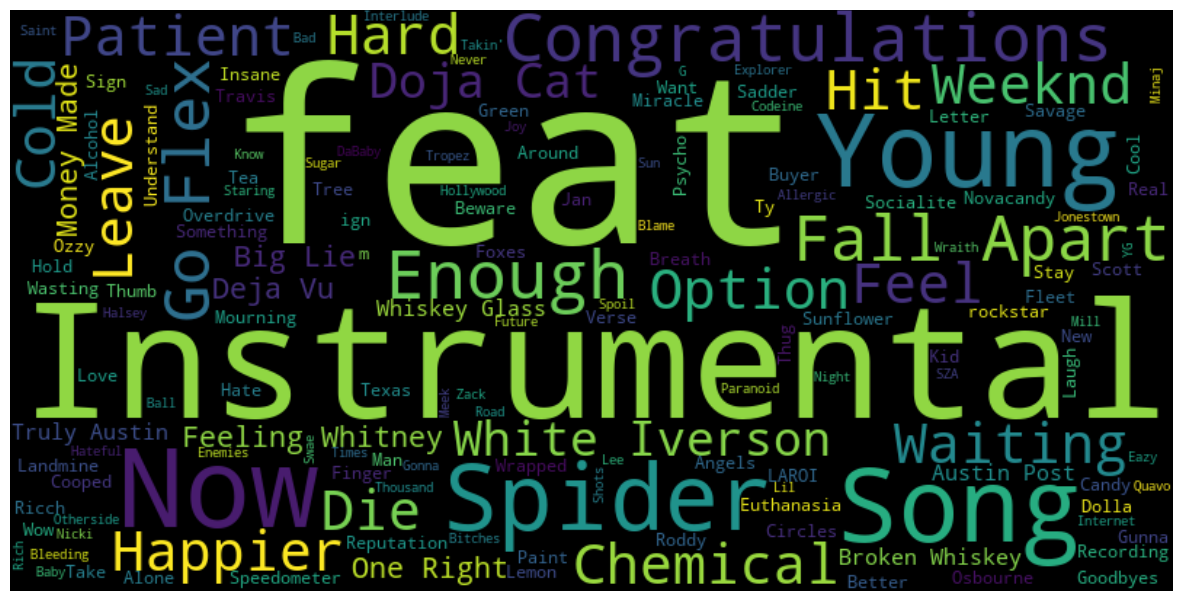

In [210]:
# Seleciona as músicas mais populares
top_songs = df.nlargest(183,'popularidade')['nome_da_faixa']

# Cria uma string única com todas as músicas
text = ' '.join(song for song in top_songs)

# Cria a nuvem de palavras
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostra a nuvem de palavras
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()